In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import pickle

In [3]:
import matplotlib as mpl
from cycler import cycler

mpl.rcParams['lines.linewidth'] = 1
mpl.rcParams['lines.markersize'] = 1.4

mpl.rcParams['xtick.top'] = True
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['xtick.minor.visible'] = True
mpl.rcParams['xtick.major.width'] = 0.4
mpl.rcParams['xtick.minor.width'] = 0.4
mpl.rcParams['xtick.major.size'] = 4
mpl.rcParams['xtick.minor.size'] = 2

mpl.rcParams['ytick.right'] = True
mpl.rcParams['ytick.direction'] = 'in'
mpl.rcParams['ytick.minor.visible'] = True
mpl.rcParams['ytick.major.width'] = 0.4
mpl.rcParams['ytick.minor.width'] = 0.4
mpl.rcParams['ytick.major.size'] = 4
mpl.rcParams['ytick.minor.size'] = 2

mpl.rcParams['xtick.labelsize'] = 10
mpl.rcParams['ytick.labelsize'] = 10

mpl.rcParams['axes.titlesize'] = 10
mpl.rcParams['axes.labelsize'] = 10


mpl.rcParams['legend.frameon'] = False
mpl.rcParams['legend.fontsize'] = 9

mpl.rcParams['figure.figsize'] = 6, 4

mpl.rcParams['axes.prop_cycle'] = cycler("color", ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'])
colors = ['#1f77b4', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf', '#ff7f0e']

# Plotting
fig_dir = "../figs"

def create_lineplot_histogram(distribution, bins=20):
    vals, bin_edges = np.histogram(distribution, bins=bins)

    xvals = np.repeat(bin_edges, 2)
    yvals = np.repeat(vals, 2)
    yvals = np.concatenate(([0], yvals, [0]))

    return xvals, yvals

In [44]:
import re

def get_multiplier(string):
    pattern = r'_m(\d+)'
    match = re.search(pattern, string)
    if match:
        return int(match.group(1))
    return None

def get_side_effect(string):
    pattern = r'_s(\d+)'
    match = re.search(pattern, string)
    if match:
        return int(match.group(1))
    return None

In [40]:
# model_name = 'gemma-2-2b-it'
model_name = 'gemma-2b-it'

In [ ]:
clamp_feature_activation_5x_50features_layer3_sparsity_thres0

In [69]:
data_dir = '../data/unlearn_results/gemma-2b-it/sae/'
sae_files = os.listdir(data_dir)
sae_files = [x for x in sae_files if x != '.ipynb_checkpoints']
print(sae_files)

sae_df = []
for file in sae_files:
    with open(os.path.join(data_dir, file), 'rb') as f:
        metrics_list = pickle.load(f)
        # metrics_list.append(metrics)
        
    # get pattern _layer{layer}_sparsity_thres{thres}
    multiplier = get_multiplier(file)
    side_effect_threshold = get_side_effect(file)
    
    n_se_questions = 0
    n_se_correct_questions = 0

    for metrics in metrics_list:
        row = {}

        for dataset in metrics:
            if dataset == 'loss_added':
                row[dataset] = metrics[dataset]
            elif dataset == 'ablate_params':
                for k in metrics[dataset]:
                    row[k] = metrics[dataset][k]
            else:
                row[dataset] = metrics[dataset]['mean_correct']
                
                if dataset not in ['college_biology', 'wmdp-bio']:
                    n_se_correct_questions += metrics[dataset]['total_correct']
                    n_se_questions += len(metrics[dataset]['is_correct'])
                    # print(n_se_correct_questions, n_se_questions)
                    # print(dataset)
        
        row['multiplier'] = multiplier
        row['side_effect_threshold'] = side_effect_threshold
        # row['sparsity_thres'] = thres
        # row['n_features'] = len(row['features_to_ablate'])
        row['all_side_effects_mcq'] = n_se_correct_questions / n_se_questions
        sae_df.append(row)
    
sae_df = pd.DataFrame(sae_df)
sae_df

['clamp_feature_activation_m20_side_effect_s1_increasing_loss_added', 'clamp_feature_activation_m20_side_effect_s2_increasing_loss_added', 'clamp_feature_activation_m20_side_effect_s0_increasing_loss_added', 'clamp_feature_activation_m25_side_effect_s2_increasing_loss_added', 'clamp_feature_activation_m25_side_effect_s0_increasing_loss_added']


,loss_added,wmdp-bio,high_school_us_history,college_computer_science,high_school_geography,human_aging,college_biology,multiplier,side_effect_threshold,all_side_effects_mcq
0,0.001021,0.988372,1.000000,1.00,1.000000,1.0000,1.000,20,1,1.000000
1,0.003441,0.941860,1.000000,1.00,1.000000,1.0000,1.000,20,1,1.000000
2,0.004461,0.930233,1.000000,1.00,1.000000,1.0000,1.000,20,1,1.000000
3,0.004695,0.755814,1.000000,1.00,1.000000,1.0000,0.750,20,1,1.000000
4,0.004920,0.790698,1.000000,1.00,1.000000,1.0000,0.750,20,1,1.000000
5,0.004980,0.686046,1.000000,1.00,1.000000,0.9375,0.750,20,1,0.996599
6,0.005137,0.488372,1.000000,1.00,1.000000,0.9375,0.625,20,1,0.994169
7,0.011964,0.465116,1.000000,1.00,1.000000,0.9375,0.625,20,1,0.992347
8,0.014977,0.465116,1.000000,1.00,1.000000,0.9375,0.625,20,1,0.990930
9,0.020841,0.453488,1.000000,1.00,1.000000,0.9375,0.625,20,1,0.989796


In [31]:
rmu_df = []
data_dir = '../data/unlearn_results/gemma-2b-it/rmu/correct/'
rmu_files = os.listdir(data_dir)


# def get_rmu_hyper_param(string):
#     pattern = r's(\d+)_a(\d+)_layer(\d+).pkl'
#     match = re.search(pattern, string)
#     if match:
#         return int(match.group(1)), int(match.group(2)), int(match.group(3))
#     return None

for file in rmu_files:
    with open(os.path.join(data_dir, file), 'rb') as f:
        metrics = pickle.load(f)
    
    # s, a, layer = get_rmu_hyper_param(file)
    row = {}

    n_se_questions = 0
    n_se_correct_questions = 0

    for dataset in metrics:
        if dataset == 'loss_added':
            row[dataset] = metrics[dataset].item()
        elif dataset == 'loss_return':
            continue
        elif dataset == 'ablate_params':
            for k in metrics[dataset]:
                row[k] = metrics[dataset][k]
        else:
            row[dataset] = metrics[dataset]['mean_correct']
            
            if dataset not in ['college_biology', 'wmdp-bio']:
                n_se_correct_questions += metrics[dataset]['total_correct']
                n_se_questions += len(metrics[dataset]['is_correct'])
            
    # row['layer'] = layer
    # row['s'] = s
    # row['a'] = a
    row['all_side_effects_mcq'] = n_se_correct_questions / n_se_questions
    
    # print(n_se_questions)

    rmu_df.append(row)
    
rmu_df = pd.DataFrame(rmu_df)
rmu_df
        
    

,wmdp-bio,high_school_us_history,high_school_geography,college_computer_science,human_aging,college_biology,loss_added,all_side_effects_mcq
0,0.994186,1.0,1.0,1.0,1.0,1.000000,-0.005147,1.0
1,0.348837,1.0,1.0,1.0,1.0,0.933333,0.102115,1.0
2,0.994186,1.0,1.0,1.0,1.0,1.000000,-0.005457,1.0
3,0.377907,1.0,1.0,1.0,1.0,0.933333,0.000608,1.0
4,0.616279,1.0,1.0,1.0,1.0,0.933333,-0.001731,1.0


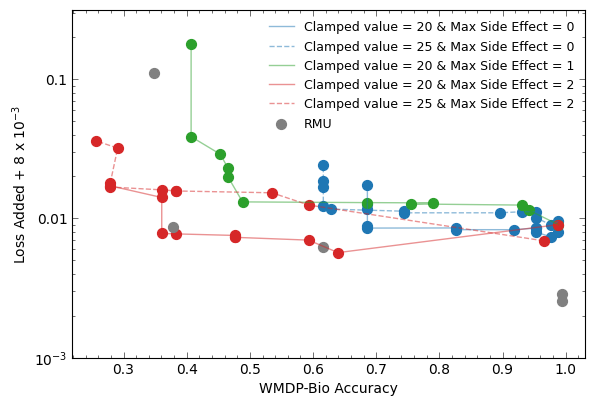

In [74]:
def plot_metrics(df, x_col, y_col, color_col, fig_name, rmu_df=None):
    fig, ax = plt.subplots(figsize=(6, 4))

    if y_col == 'loss_added':
        # y_min = df[y_col].min()
        # offset = abs(y_min) + 1e-4 if y_min <= 0 else 0
        # print(offset)
        offset = 8e-3
        
    # Get unique values
    unique_values = df[color_col].unique()
    
    
    df0 = df.query("multiplier == 20 & side_effect_threshold == 0")
    df1 = df.query("multiplier == 25 & side_effect_threshold == 0")
    df4 = df.query("multiplier == 20 & side_effect_threshold == 1")
    df2 = df.query("multiplier == 20 & side_effect_threshold == 2")
    df3 = df.query("multiplier == 25 & side_effect_threshold == 2")
    df_list = [df0, df1, df4, df2, df3]
    multipliers = [20, 25, 20, 20, 25]
    se_max = [0, 0, 1, 2, 2]
    plot_colors = [colors[0], colors[0], colors[1], colors[2], colors[2]]
    plot_linestyles = ['-', '--', '-', '-', '--']
    labels = [f'Clamped value = {value} & Max Side Effect = {se}' for value, se in zip(multipliers, se_max)]


    # Create a scatter plot and line for each unique value
    for subset, color, ls, label in zip(df_list, plot_colors, plot_linestyles, labels):
        # subset = df[df[color_col] == value].sort_values(by=x_col)
        # color = colors[i % len(colors)]
        
        if y_col == 'loss_added':
            y_values = np.log10(subset[y_col] + offset)
        else:
            y_values = subset[y_col]
        # Plot line
        ax.plot(subset[x_col], y_values, color=color, alpha=0.5, linestyle=ls, label=label)
        
        
        # Plot scatter points
        ax.scatter(subset[x_col], y_values, 
                    c=[color], s=50)
    
    # Plot RMU results
    if rmu_df is not None:
        y_values = np.log10(rmu_df[y_col] + offset)
        ax.scatter(rmu_df[x_col], y_values, c='grey', label='RMU', s=50)

    yticks = [-4, -3, -2, -1]
    yticklabels = [r"10$^{-4}$", r"10$^{-3}$", 0.01, 0.1]
    yminor_ticks = np.log10(np.concatenate((np.arange(1e-4, 1e-3, 1e-4),
                                            np.arange(1e-3, 1e-2, 1e-3),
                                            np.arange(1e-2, 1e-1, 1e-2),
                                            np.arange(1e-1, 1, 1e-1))))

    ax.set_yticks(yticks)
    ax.set_yticklabels(yticklabels)
    ax.set_yticks(yminor_ticks, minor=True)

    ax.set_ylim(-3, -0.5)

    ax.legend()

    ax.set_xlabel('WMDP-Bio Accuracy')
    ax.set_ylabel(f'Loss Added + 8 x 10$^{{-3}}$')
    

    fig.subplots_adjust(right=0.98, top=0.98)
    fig.savefig(fig_dir + f"/multiple_features/{model_name}_{fig_name}.png", dpi=400)
    # plt.show()


plot_metrics(
    sae_df, 
    x_col='wmdp-bio', 
    y_col='loss_added', 
    color_col='multiplier', 
    fig_name='wmdp-bio_vs_loss_added',
    rmu_df=rmu_df
)


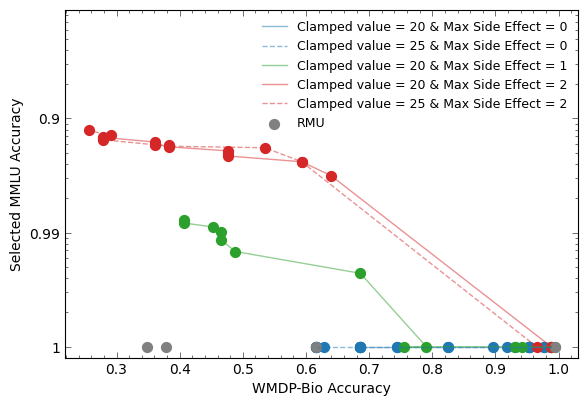

In [77]:
def plot_metrics(df, x_col, y_col, color_col, fig_name, rmu_df=None):
    fig, ax = plt.subplots(figsize=(6, 4))

    # Get unique values
    unique_values = df[color_col].unique()
    
    eps = 1e-3
    
    df0 = df.query("multiplier == 20 & side_effect_threshold == 0")
    df1 = df.query("multiplier == 25 & side_effect_threshold == 0")
    df4 = df.query("multiplier == 20 & side_effect_threshold == 1")
    df2 = df.query("multiplier == 20 & side_effect_threshold == 2")
    df3 = df.query("multiplier == 25 & side_effect_threshold == 2")
    df_list = [df0, df1, df4, df2, df3]
    multipliers = [20, 25, 20, 20, 25]
    se_max = [0, 0, 1, 2, 2]
    plot_colors = [colors[0], colors[0], colors[1], colors[2], colors[2]]
    plot_linestyles = ['-', '--', '-', '-', '--']
    labels = [f'Clamped value = {value} & Max Side Effect = {se}' for value, se in zip(multipliers, se_max)]


    # Create a scatter plot and line for each unique value
    for subset, color, ls, label in zip(df_list, plot_colors, plot_linestyles, labels):

        y_value = np.log10(1 - subset[y_col] + eps)
        # Plot line
        ax.plot(subset[x_col], y_value, color=color, alpha=0.5, linestyle=ls, label=label)
        
        # Plot scatter points
        ax.scatter(subset[x_col], y_value, 
                    c=[color],  s=50)
    
    # Plot RMU results
    if rmu_df is not None:
        y_value = np.log10(1 - rmu_df[y_col] + eps)
        ax.scatter(rmu_df[x_col], y_value, c='grey', label='RMU', s=50)


    yticks = [-3, -2, -1]
    yticklabels = [1, 0.99, 0.9]
    yminor_ticks = np.log10(np.concatenate((np.arange(1e-3, 1e-2, 1e-3),
                                            np.arange(1e-2, 1e-1, 1e-2),
                                            np.arange(1e-1, 1, 1e-1))))

    ax.set_yticks(yticks)
    ax.set_yticklabels(yticklabels)
    ax.set_yticks(yminor_ticks, minor=True)
    
    ax.legend()

    ax.set_xlabel('WMDP-Bio Accuracy')
    ax.set_ylabel(f'Selected MMLU Accuracy')
    # ax.invert_yaxis()

    fig.subplots_adjust(right=0.98, top=0.98)
    fig.savefig(fig_dir + f"/multiple_features/{model_name}_{fig_name}.png", dpi=400)
    # plt.show()


# df = sae_df[sae_df['sparsity_thres'] == 0.001]
plot_metrics(
    sae_df, 
    x_col='wmdp-bio', 
    y_col='all_side_effects_mcq', 
    color_col='multiplier', 
    fig_name='wmdp-bio_vs_all_side_effects_mcq',
    rmu_df=rmu_df
)
